In [1]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

%matplotlib inline


In [2]:
# Import data 
df = pd.read_csv('sales.csv')
df['date'] = df.date.astype('datetime64[ns]') 
df

,week,date,price,quantity,cost
0,1,2019-02-01,1.84,0,0.36
1,2,2019-02-08,1.39,11,0.70
2,3,2019-02-15,1.47,9,0.87
3,4,2019-02-22,1.15,3,0.91
4,5,2019-03-01,1.76,12,0.50
...,...,...,...,...,...
97,98,2020-12-11,1.04,1,0.09
98,99,2020-12-18,1.32,10,0.16
99,100,2020-12-25,1.39,15,0.97
100,101,2021-01-01,1.87,17,0.79


## Plot range

Set ranges of the axes using the `set_ylim` and `set_xlim` methods in the axis object.

Text(0.5, 1.0, 'Weekly Prices and Costs')

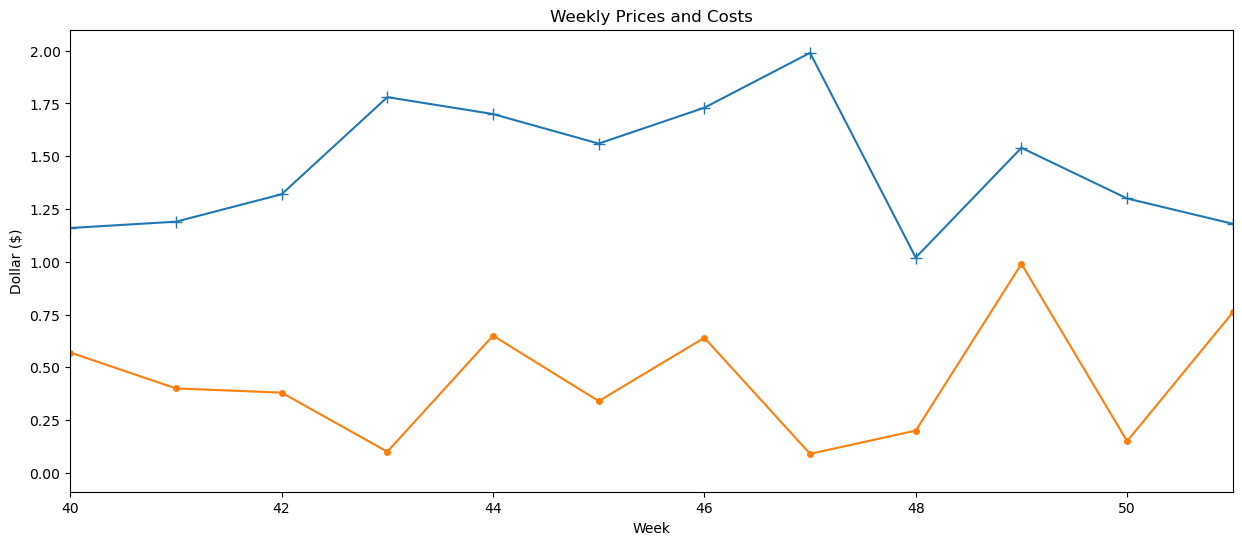

In [3]:
fig, ax = plt.subplots(figsize=(15,6))

ax.plot(df.week, df.price, marker='+', markersize=8) 
ax.plot(df.week, df.cost, marker='o', markersize=4) 
ax.set_xlabel('Week') 
ax.set_ylabel('Dollar ($)')
ax.set_xlim([40, 51])
ax.set_title('Weekly Prices and Costs')


Text(0.5, 1.0, 'Weekly Prices and Costs')

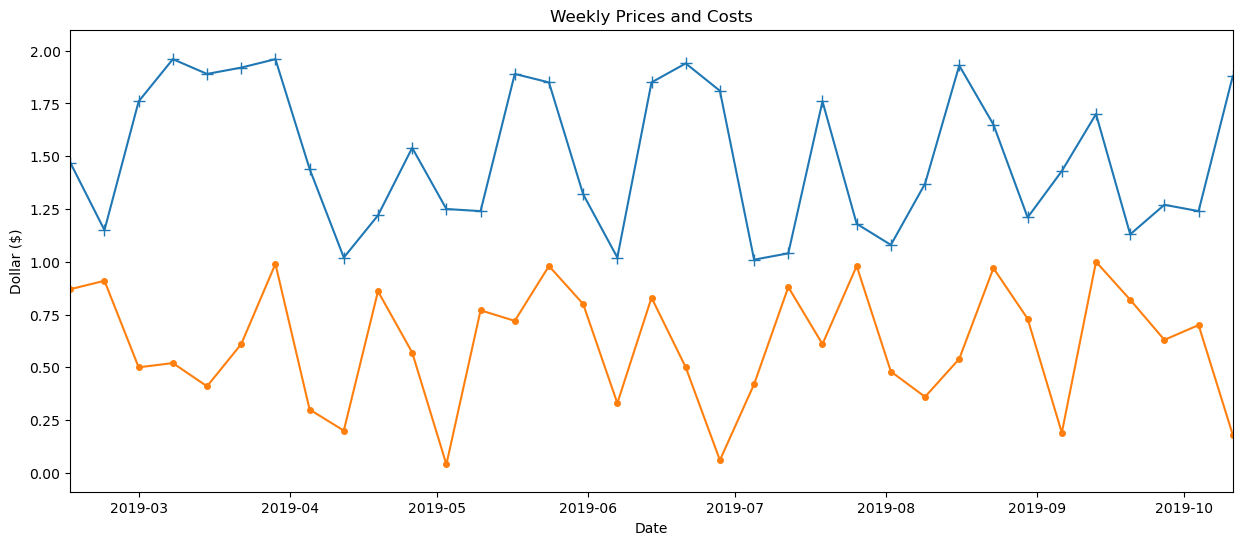

In [4]:
import datetime 

fig, ax = plt.subplots(figsize=(15,6))

ax.plot(df.date, df.price, marker='+', markersize=8)
ax.plot(df.date, df.cost, marker='o', markersize=4) 
ax.set_xlabel('Date')
ax.set_ylabel('Dollar ($)')
ax.set_xlim([datetime.datetime(2019,2,15), datetime.datetime(2019,10,11)])
ax.set_title('Weekly Prices and Costs')


# Other Plots

There are many specialized plots such as barplots, histograms, scatter plots, and more. Most of them are more conveniently created using seaborn. Here are a few examples using matplotlib:

In [5]:
df2 = pd.read_csv('tips.csv')
df2

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [6]:
df3 = df2.value_counts('day').to_frame().reset_index()
df3.columns = ['day', 'bills']
df3

,day,bills
0,Sat,87
1,Sun,76
2,Thur,62
3,Fri,19


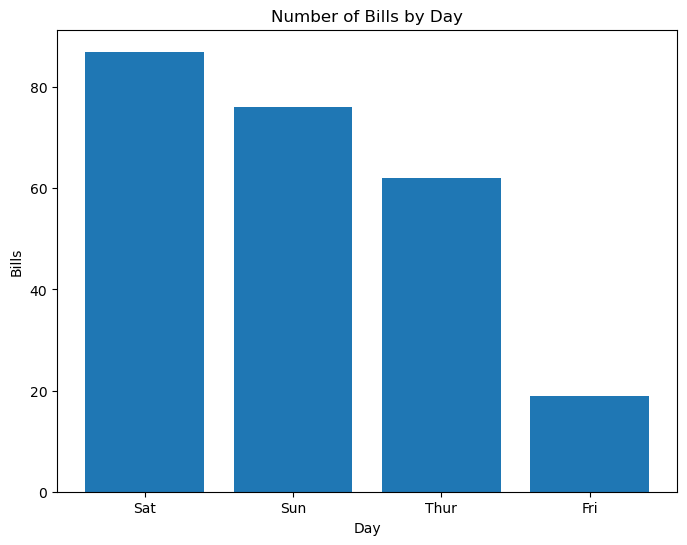

In [7]:
fig, ax = plt.subplots(figsize=(8,6))

ax.bar(df3.day, df3.bills)

ax.set_xlabel('Day')
ax.set_ylabel('Bills')
ax.set_title('Number of Bills by Day')

plt.show()


In [8]:
df3 = df2.value_counts('day').to_frame().reindex(['Thur', 'Fri', 'Sat', 'Sun']).reset_index()
df3.columns = ['day', 'bills']
df3

,day,bills
0,Thur,62
1,Fri,19
2,Sat,87
3,Sun,76


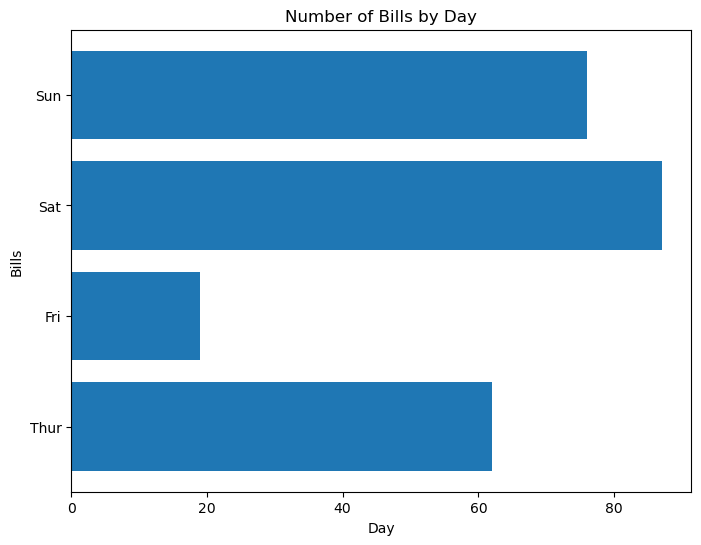

In [9]:
fig, ax = plt.subplots(figsize=(8,6))

ax.barh(df3.day, df3.bills)

ax.set_xlabel('Day')
ax.set_ylabel('Bills')
ax.set_title('Number of Bills by Day')

plt.show()


In [10]:
df3

,day,bills
0,Thur,62
1,Fri,19
2,Sat,87
3,Sun,76


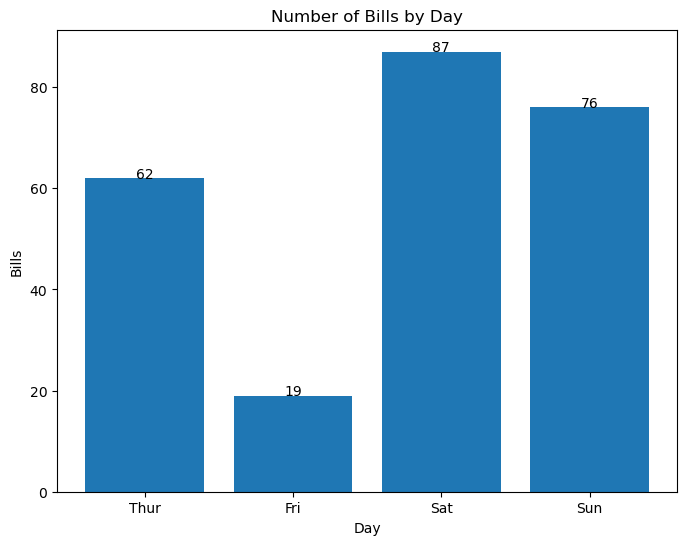

In [11]:
# bar chart (barplot)
fig, ax = plt.subplots(figsize=(8,6))

ax.bar(df3.day, df3.bills)

ax.set_xlabel('Day')
ax.set_ylabel('Bills')
ax.set_title('Number of Bills by Day')

for i in range(len(df3)):
    plt.text(i, df3.bills[i], df3.bills[i], ha = 'center')
        
plt.show()


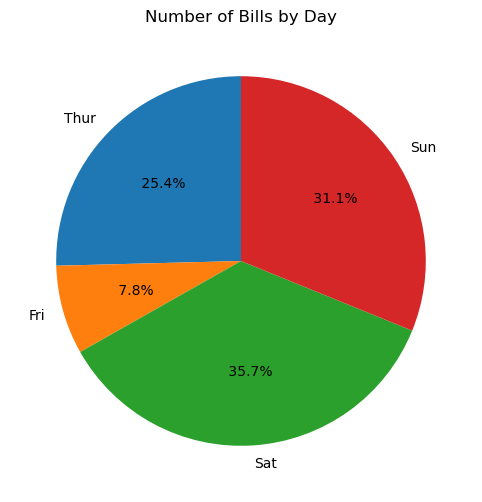

In [12]:
fig, ax = plt.subplots(figsize=(8,6))

ax.pie(df3.bills, labels = df3.day, autopct ='% .1f%%', startangle = 90)
  
ax.set_title('Number of Bills by Day')

plt.show()


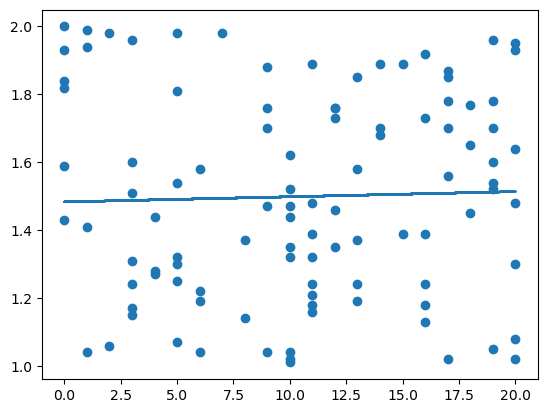

In [13]:
plt.scatter(df.quantity, df.price)

m, b = np.polyfit(df.quantity, df.price, 1)

plt.plot(df.quantity, m*df.quantity + b)


(array([ 6.,  4.,  2.,  7.,  3.,  7.,  4.,  1.,  2.,  5.,  9.,  8.,  5.,
         5.,  3.,  2.,  6.,  6.,  3., 14.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20.]),
 <a list of 20 Patch objects>)

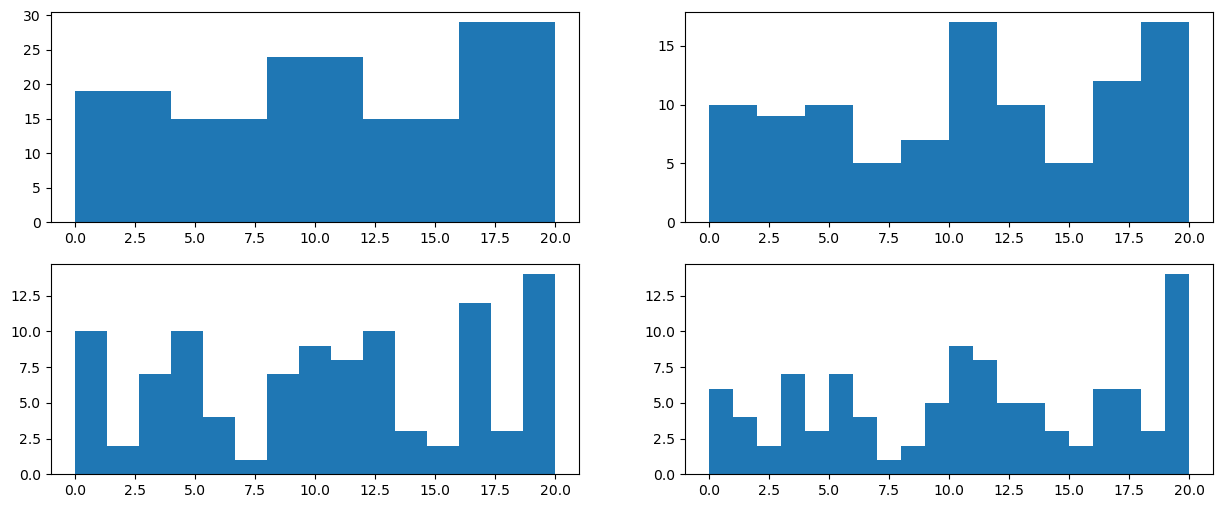

In [14]:
plt.subplots(figsize=(15,6))

plt.subplot(2,2,1)
plt.hist(df.quantity, bins=5)
plt.subplot(2,2,2)
plt.hist(df.quantity, bins=10)
plt.subplot(2,2,3)
plt.hist(df.quantity, bins=15)
plt.subplot(2,2,4)
plt.hist(df.quantity, bins=20)

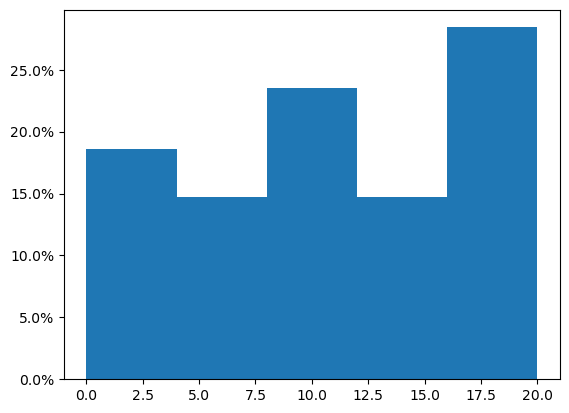

In [15]:
from matplotlib.ticker import PercentFormatter

plt.hist(df.quantity, weights=np.ones(len(df.quantity))/len(df.quantity), bins=5)

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

plt.show()


Text(0, 0.5, 'Dollar ($)')

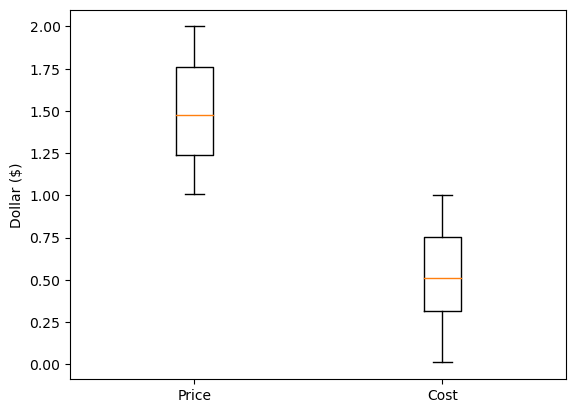

In [16]:
plt.boxplot([df.price, df.cost])

plt.xticks(np.arange(1, 3), ('Price', 'Cost'))

plt.ylabel('Dollar ($)') 


C:\Users\andyc\Anaconda3\envs\base2\lib\site-packages\matplotlib\cbook\__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


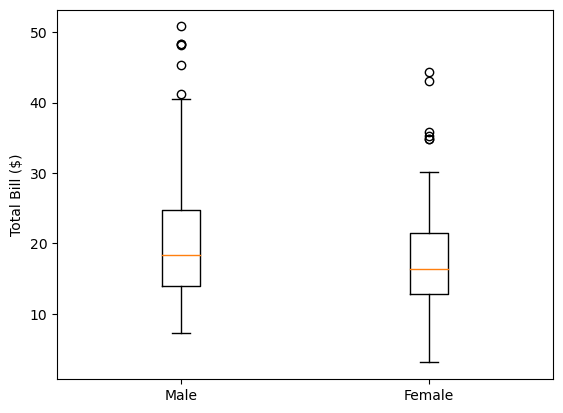

In [17]:

df2_m = df2[df2.sex == 'Male'].total_bill.to_list()
df2_f = df2[df2.sex == 'Female'].total_bill.to_list()

plt.boxplot([df2_m, df2_f])

plt.xticks(np.arange(1, 3), ('Male', 'Female'))

plt.ylabel('Total Bill ($)') 

plt.show()
